<a href="https://colab.research.google.com/github/fernandovieira1/FinScore/blob/main/FINSCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# INTRUÇÕES**

* Antes de iniciar, certifique-se de estar logado na sua conta Google.

* Um botão azul 'Fazer login', localizado no canto superior direito da tela, aparecerá, se não.

* Feito isto, basta inserir os dados nas seções abaixo descritas:
    - 1.1 Cliente
    - 1.2 Período
    - 1.3 Lançamento dos dados Contábeis

* Cada uma das seções mencionadas possui anotações sobre como proceder.

* Logo após, clique no menu "Ambiente de execução" e em "Executar tudo" (ou CTR + F9), nesta ordem.

##### 1. LANÇAMENTO DOS DADOS #####

##### 1.1 Cliente

*--> Insira o nome do cliente/empresa*

In [1]:
# Cliente
cliente = 'COMPASS UOL TECNOLOGIA'

##### 1.2 Período

*--> Insira os anos inicial (a primeira) e final (da última) das demonstrações contábeis que serviram de base para a análise*

In [2]:
# Ano Inicial
ano_inicial = 2021

In [3]:
# Ano Final
ano_final = 2023

##### 1.3 Lançamento dos dados Contábeis

*--> Acesse a planilha abaixo (CTRL + click) e insira as informações nas linhas e colunas respectivas*

In [4]:
# Lance do ano mais recente para o mais antigo
'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

*--> Agora basta clicar no menu "Ambiente de execução" e em "Executar tudo" (ou CTR + F9), nesta ordem.*

##### CONFIGURAÇÃO DO AMBIENTE

##### Configuração do ambiente

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import subprocess
import importlib.util


In [6]:
%%capture
# Lista de pacotes necessários
required_packages = ["gspread", "pandas", "gspread_dataframe", "openpyxl"]

# Verificar e instalar pacotes que não estão instalados
def install_missing_packages(packages):
    for package in packages:
        if importlib.util.find_spec(package) is None:
            print(f"⚠ Instalando {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
        else:
            print(f"✔ {package} já está instalado")

install_missing_packages(required_packages)

In [7]:
# Definir o ID da planilha e da aba (worksheet)
sheet_id = "1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33"
gid = "1575975872"  # ID da aba específica

# Construir a URL para baixar a planilha como um arquivo Excel (.xlsx)
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={gid}"

# Ler a planilha diretamente no Pandas
df_dados_contabeis = pd.read_excel(url, engine="openpyxl")

In [8]:
# Função para calcular os índices contábeis
def calcular_indices_contabeis(df):
    indices = {}

    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obrigações de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca é uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem Líquida'] = df['Lucro Líquido'] / df['Receita Total']
    # Lucro Líquido: DRE
    # Receita Total: DRE
    # => A margem líquida mede a porcentagem de lucro líquido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro Líquido'] / df['Ativo Total']
    # Lucro Líquido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a eficiência da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro Líquido'] / df['Patrimônio Líquido']
    # Lucro Líquido: DRE
    # Patrimônio Líquido: BP
    # => O retorno sobre o patrimônio líquido (ROE) mede a eficiência da empresa em gerar lucro a partir de seu patrimônio líquido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a proporção de dívidas da empresa em relação ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais

    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a eficiência da empresa em gerar receita a partir de seus ativos.

    indices['Período Médio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O período médio de recebimento mede o tempo médio que a empresa leva para receber suas vendas.

    indices['Período Médio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O período médio de pagamento mede o tempo médio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



##### Criação de funções

In [9]:
# Função para categorizar escores consolidados com mais granularidade
def categorizar_escores_consolidados(escores):
    categorias = []
    for escore in escores:
        if escore > 1.5:
            categorias.append('Muito Abaixo do Risco')
        elif 1.0 < escore <= 1.5:
            categorias.append('Levemente Abaixo do Risco')
        elif -1.0 <= escore <= 1.0:
            categorias.append('Neutro')
        elif -1.5 < escore < -1.0:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore   |      Categoria            |
# -------------------------------------------------------
# |  escore > 1.5           | Muito Abaixo do Risco     |
# |  1.0 < escore ≤ 1.5     | Levemente Abaixo do Risco |
# | -1.0 ≤ escore ≤ 1.0     | Neutro                    |
# | -1.5 < escore < -1.0    | Levemente Acima do Risco  |
# |  escore ≤ -1.5          | Muito Acima do Risco      |
# -------------------------------------------------------

##### Importação dos Dados Contábeis

In [10]:
## Importar os dados
# - Do mais recente para o mais antigo

# arquivo_dados_contabeis = '/content/dados_contabeis_global.xlsx'
arquivo_dados_contabeis = df_dados_contabeis

In [11]:
arquivo_dados_contabeis

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,2.112572e+08,347182372.8,0,36277177.54,572519640.2,909291779.2,2.579706e+08,651321219.0,86396617.03,50119439.49,1.838093e+08,241356691.1,460932909.5
1,1,8.413870e+07,253277634.2,0,51720104.88,460925515.5,874614102.3,1.421942e+08,732419886.5,89699463.62,37979358.74,6.479766e+07,170957750.5,351496752.5
2,2,4.630516e+07,171041883.3,0,47930623.77,312716722.6,719777524.1,9.223836e+07,627539164.2,52781685.98,4851062.21,4.078698e+07,126906821.7,230628690.6


##### Leitura dos Dados Contábeis

In [12]:
df_dados_contabeis = arquivo_dados_contabeis
print('Dados Contabeis Importados:')
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro Líquido  \
0    0      2.112572e+08         347182372.8         0    36277177.54   
1    1      8.413870e+07         253277634.2         0    51720104.88   
2    2      4.630516e+07         171041883.3         0    47930623.77   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total         EBIT  \
0    572519640.2  909291779.2        2.579706e+08    651321219.0  86396617.03   
1    460925515.5  874614102.3        1.421942e+08    732419886.5  89699463.62   
2    312716722.6  719777524.1        9.223836e+07    627539164.2  52781685.98   

   Despesa de Juros  Contas a Receber  Contas a Pagar       Custos  
0       50119439.49      1.838093e+08     241356691.1  460932909.5  
1       37979358.74      6.479766e+07     170957750.5  351496752.5  
2        4851062.21      4.078698e+07     126906821.7  230628690.6  


##### 2. PROCESSAMENTO DO MODELO #####

##### 2.1 Índices contábeis

In [13]:
df_indices = calcular_indices_contabeis(df_dados_contabeis).round(2)
print('\nÍndices Contábeis Calculados:')


Índices Contábeis Calculados:


In [14]:
if (df_dados_contabeis['Estoques'] == 0).all():
        del df_indices['Liquidez Seca']

In [15]:
print(df_indices)

   Liquidez Corrente  Margem Líquida   ROA   ROE  Endividamento  \
0               0.61            0.06  0.04  0.14           0.72   
1               0.33            0.11  0.06  0.36           0.84   
2               0.27            0.15  0.07  0.52           0.87   

   Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
0                1.72           0.63                        117.18   
1                2.36           0.53                         51.31   
2               10.88           0.43                         47.61   

   Período Médio de Pagamento  
0                      191.12  
1                      177.53  
2                      200.85  


##### 2.2 Padronização dos índices contábeis

In [16]:
# Escalar os índices contábeis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print('\nÍndices Escalados para PCA:')
print(indices_scaled)


Índices Escalados para PCA:
[[ 1.39475594 -1.26750044 -1.33630621 -1.28388148 -1.38873015 -0.78236039
   1.22474487  1.41263309  0.13453615]
 [-0.4949134   0.09053575  0.26726124  0.12838815  0.46291005 -0.62908162
   0.         -0.64843029 -1.28645839]
 [-0.89984254  1.1769647   1.06904497  1.15549333  0.9258201   1.41144201
  -1.22474487 -0.76420279  1.15192224]]


##### 2.3 Cálculo do PCA

In [17]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print('\nComponentes Principais (PCA):')
print(pca_result)

#relatório



Componentes Principais (PCA):
[[-3.54268331e+00  6.99752699e-01  1.56173082e-16]
 [ 3.89633117e-01 -1.69549419e+00  1.56173082e-16]
 [ 3.15305019e+00  9.95741489e-01  1.56173082e-16]]


##### 2.4 Variância Explicada PCA

In [18]:
# Variância explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print('\nVariância Explicada por Componente:')
print(explained_variance_ratio)

#relatório


Variância Explicada por Componente:
[8.38672019e-01 1.61327981e-01 2.71000350e-33]


##### 2.5 DataFrame PCA

In [19]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print('\nMatriz de Componentes Principais:')
print(pca_df)

#relatório


Matriz de Componentes Principais:
        PC1       PC2           PC3
0 -3.542683  0.699753  1.561731e-16
1  0.389633 -1.695494  1.561731e-16
2  3.153050  0.995741  1.561731e-16


##### 2.6 Matriz de cargas

In [20]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

print('Matriz de Cargas dos Componentes Principais:')
print(loadings)

# Identificar os índices mais significativos para cada PC
print('\nÍndices mais significativos por componente:')
for pc in loadings.index:
    print(f'\n{pc}:')
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 índices mais significativos

#relatório

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Margem Líquida       ROA       ROE  Endividamento  \
PC1          -0.352023        0.363743  0.362522  0.363968       0.354147   
PC2           0.211003        0.030192 -0.074321  0.007918      -0.191639   
PC3          -0.266880       -0.084444 -0.411171  0.140071      -0.219193   

     Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
PC1            0.308110      -0.362149                     -0.338575   
PC2            0.441837      -0.083224                      0.304637   
PC3            0.667762      -0.040418                      0.159321   

     Período Médio de Pagamento  
PC1                    0.117214  
PC2                    0.785688  
PC3                   -0.460428  

Índices mais significativos por componente:

PC1:
ROE               0.363968
Margem Líquida    0.363743
ROA               0.362522
Name: PC1, dtype: float64

PC2:
Período Médio de Pagamento      0.785688
Cobertura de Jur

##### 2.7 Escore final

In [21]:
pca_df.dot(explained_variance_ratio)

0   -2.858260
1    0.053244
2    2.805016
dtype: float64

##### 3. RESULTADOS #####

##### 3.1 Valor do Escore Calculado

In [22]:
# Calcular o escore consolidado com penalização do último ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.6, 0.25, 0.15]  # Pesos para os três anos
escores_consolidados = round((pca_df.dot(explained_variance_ratio) * pesos).sum(), 2)
print('\nFinscore:')
print(escores_consolidados)


Finscore:
-1.28


##### 3.2 Classificação do Escore

In [23]:
# Categorizar os escores consolidados
categoria = categorizar_escores_consolidados([escores_consolidados])
print('\nCategoria Final:')
print(categoria)


Categoria Final:
['Levemente Acima do Risco']


##### 3.3 Valores e Contas Contábeis

In [24]:
df_dados_contabeis
# Sendo 0 o mais recente e 2 o mais antigo

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,2.112572e+08,347182372.8,0,36277177.54,572519640.2,909291779.2,2.579706e+08,651321219.0,86396617.03,50119439.49,1.838093e+08,241356691.1,460932909.5
1,1,8.413870e+07,253277634.2,0,51720104.88,460925515.5,874614102.3,1.421942e+08,732419886.5,89699463.62,37979358.74,6.479766e+07,170957750.5,351496752.5
2,2,4.630516e+07,171041883.3,0,47930623.77,312716722.6,719777524.1,9.223836e+07,627539164.2,52781685.98,4851062.21,4.078698e+07,126906821.7,230628690.6


##### 3.4 Índices contábeis

In [25]:
print(df_indices)
# Sendo 0 o mais recente e 2 o mais antigo


   Liquidez Corrente  Margem Líquida   ROA   ROE  Endividamento  \
0               0.61            0.06  0.04  0.14           0.72   
1               0.33            0.11  0.06  0.36           0.84   
2               0.27            0.15  0.07  0.52           0.87   

   Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
0                1.72           0.63                        117.18   
1                2.36           0.53                         51.31   
2               10.88           0.43                         47.61   

   Período Médio de Pagamento  
0                      191.12  
1                      177.53  
2                      200.85  


##### 4. APRESENTAÇÃO #####

##### 4.1 Criação dos dfs

In [26]:
# Df resultados principais
resultados_df = pd.DataFrame({
    'Métrica': ['Escore Consolidado', 'Categoria Final'],
    'Valor': [escores_consolidados, categoria[0]]
})
resultados_df

,Métrica,Valor
0,Escore Consolidado,-1.28
1,Categoria Final,Levemente Acima do Risco


In [27]:
resultados_df.iloc[0, 1]

-1.28

##### 4.2 Tabela Resumo

C:\Users\ferna\AppData\Local\Temp\ipykernel_4012\435080285.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.applymap(


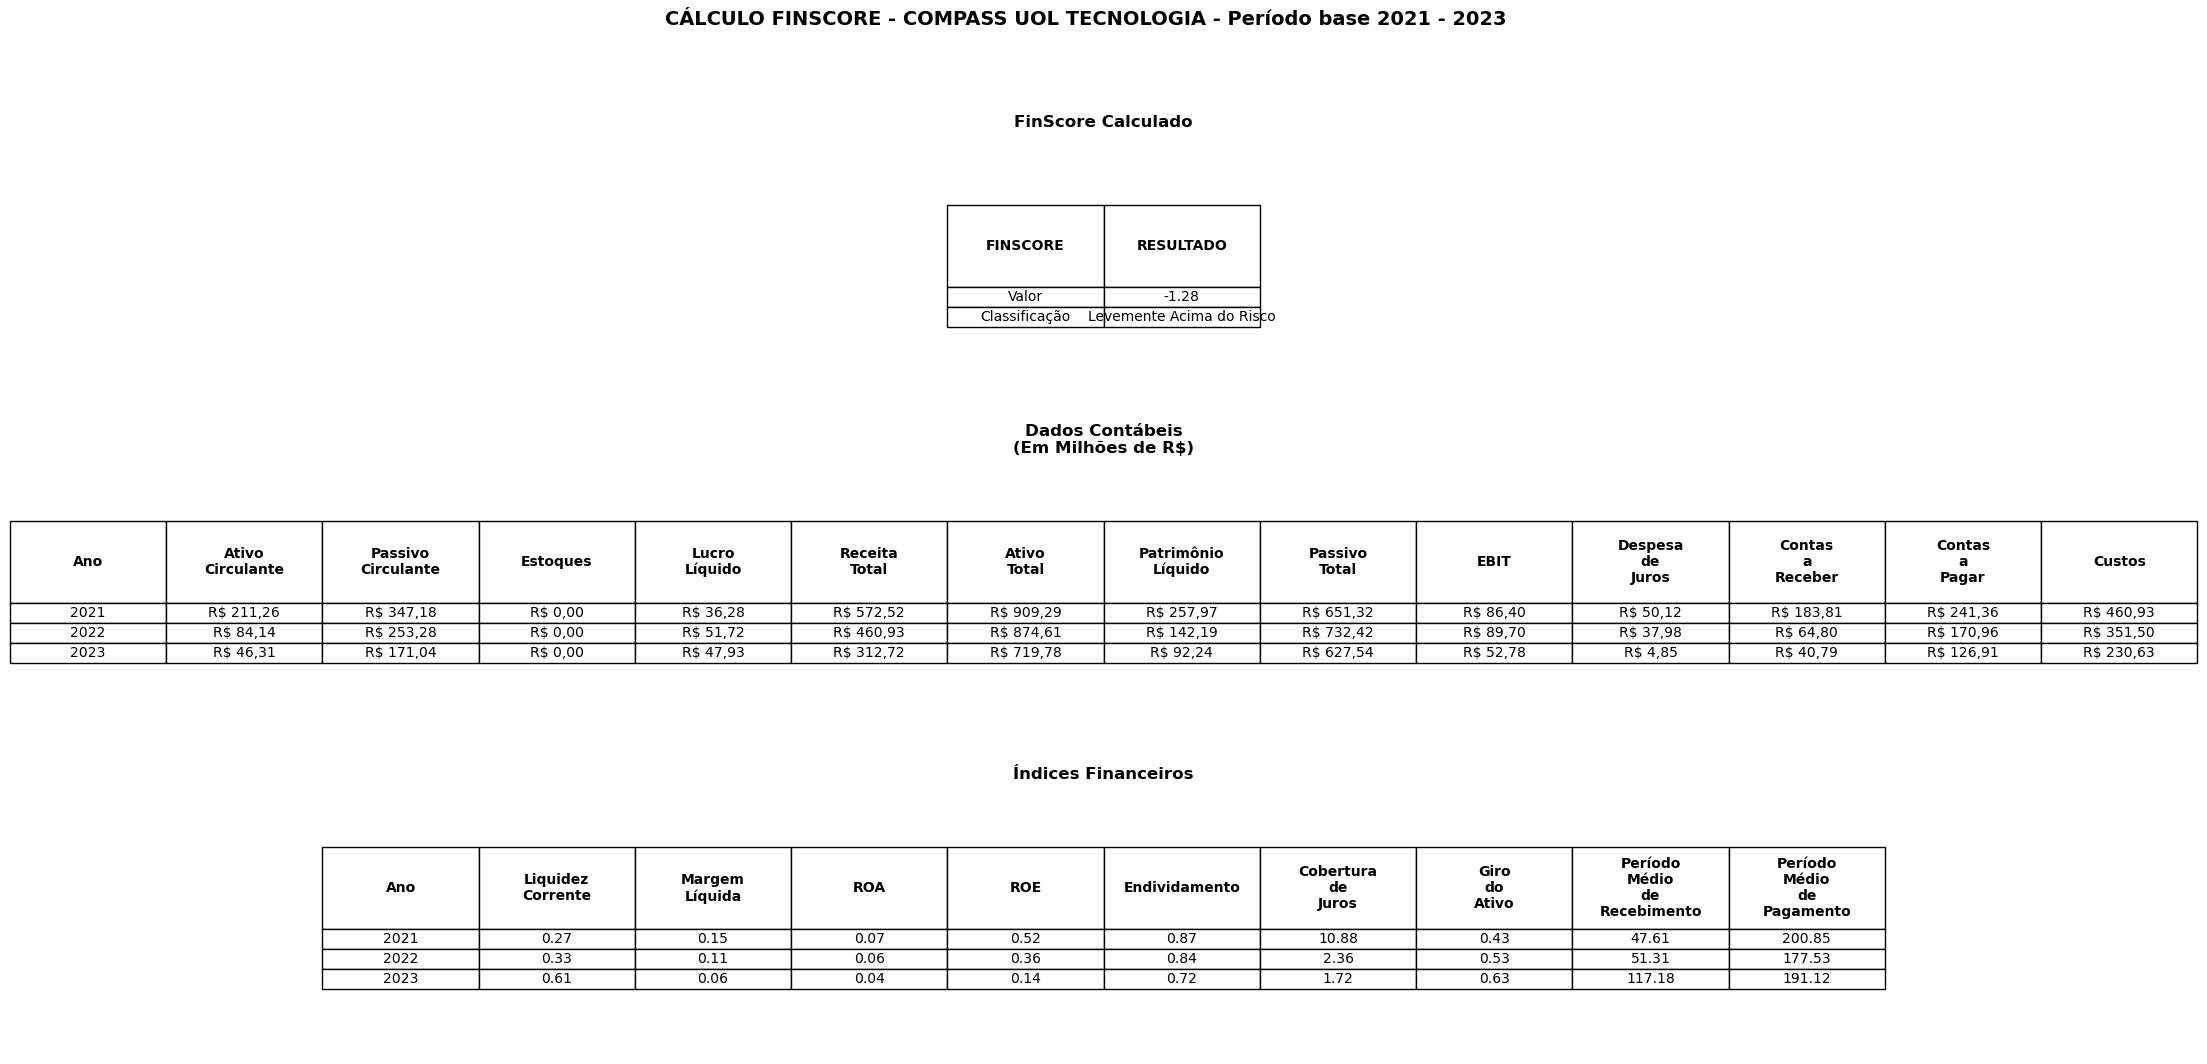

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Ajuste principal: inverter a ordem do df_indices se necessário ---
# Se seu df_indices estiver 2024, 2023, 2022, por exemplo,
# esta linha garante a ordem 2022, 2023, 2024.
df_indices = df_indices.iloc[::-1].reset_index(drop=True)

## FORMATAR PADRÃO BR
# Cópia do df original
df_dados_contabeis_milhoes = df_dados_contabeis.copy()

# Excluindo a coluna 'Ano' antes de realizar as transformações
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.drop(columns=['Ano'])

# Dividindo os valores das colunas numéricas por 1.000.000
for col in df_dados_contabeis_milhoes.columns:
    df_dados_contabeis_milhoes[col] = df_dados_contabeis_milhoes[col] / 1_000_000

# Formatando os valores para o padrão brasileiro (R$ 1.000.000,00)
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.applymap(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    if isinstance(x, (int, float)) else x
)

## INSERIR A COLUNA "ANO" NAS TABELAS "Dados Contábeis" e "Índices Financeiros"
anos = [str(ano_inicial), str(ano_inicial + 1), str(ano_final)]  # Convertendo anos para string

# Inserindo a coluna "Ano" como a primeira coluna
df_dados_contabeis_milhoes.insert(0, "Ano", anos)
df_indices.insert(0, "Ano", anos)

## FINSCORE
resultados_df = pd.DataFrame({
    "FINSCORE": ["Valor", "Classificação"],
    "RESULTADO": [resultados_df.iloc[0, 1], resultados_df.iloc[1, 1]]
})

## INSERINDO QUEBRA DE LINHA NOS CABEÇALHOS
df_dados_contabeis_milhoes.columns = [col.replace(" ", "\n") for col in df_dados_contabeis_milhoes.columns]
df_indices.columns = [col.replace(" ", "\n") for col in df_indices.columns]
resultados_df.columns = [col.replace(" ", "\n") for col in resultados_df.columns]

## CABEÇALHO
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))
fig.suptitle(
    f"CÁLCULO FINSCORE - {cliente} - Período base {ano_inicial} - {ano_final}",
    fontsize=14, fontweight="bold"
)

## TABELAS
def add_table(ax, df, title):
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center", loc="center",
        colWidths=[0.12] * len(df.columns)  # Ajustando largura das colunas
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Ajustando escala para melhor legibilidade

    # Aumentando a altura da linha do cabeçalho
    for col in range(len(df.columns)):
        table[(0, col)].set_height(0.3)

    # Destacando o cabeçalho com negrito
    for key, cell in table._cells.items():
        if key[0] == 0:  # Se for a primeira linha (cabeçalho)
            cell.set_fontsize(10)
            cell.set_text_props(weight='bold')

    ax.set_title(title, fontsize=12, fontweight="bold", pad=2)
    ax.title.set_y(0.9)

# Adicionando cada tabela
add_table(axs[0], resultados_df, "FinScore Calculado")
add_table(axs[1], df_dados_contabeis_milhoes, "Dados Contábeis\n(Em Milhões de R$)")
add_table(axs[2], df_indices, "Índices Financeiros")

plt.show()


#### 5. Prompt IA

In [29]:
print('\n INÍCIO')
print('=====================================')

print('- Crie um relatório interpretando os resultados dos cálculos feitos neste notebook, utilizando os valores das seguintes variáveis:\n')

print('* Cliente:')
print('-------------------------------')
print(cliente)

print('\n * Período da analise:')
print('-------------------------------')
print(ano_inicial, '-', ano_final)

print('\n * Dados contábeis:')
print('-------------------------------')
print(df_dados_contabeis)

print('\n * Índices Contábeis:')
print('-------------------------------')
print(df_indices)

print('\n - Analise o Cliente com base nos dfs abaixo. Interprete as saídas à vista dos dados contábeis e dos índices contábeis supracitados, contextualizando em termos de capacidade de pagamento, liquidez e resultados operacionais o que os resultados indicam.')

print('\n RESULTADOS PCA')
print('=====================================')

print('\n DF: indices_scaled:')
print('-------------------------------')
print(indices_scaled)

print('\n DF: pca_result:')
print('-------------------------------')
print(pca_result)

print('\n DF: explained_variance_ratio:')
print('-------------------------------')
print(explained_variance_ratio)

print('\n DF: pca_df:')
print('-------------------------------')
print(pca_df)

print('\n DF: loadings:')
print('-------------------------------')
print(loadings)

print('\n Finscore Final')
print('-------------------------------')
print(resultados_df.iloc[0, 1])

print('O Finscore Final é classificado segundo os seguintes critérios')

criterios_escore = """def categorizar_escores_consolidados(escores):
    categorias = []
    for escore in escores:
        if escore > 2:
            categorias.append('Muito Abaixo do Risco')
        elif 1 < escore <= 2:
            categorias.append('Abaixo do Risco')
        elif -1 <= escore <= 1:
            categorias.append('Neutro')
        elif -2 <= escore < -1:
            categorias.append('Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias
"""

print(criterios_escore)

print('\n Evite termos estatísticos e técnicos, sequer é necessário apresentar os valores relacionados ao PCA, mas cite os valores e contas dos dataframes df_dados_contabeis e df_indices, com a devida explicação (o que a conta ou índice significa), implicação em relação aos resultados e valores citados.')

print('\n Após esta contextualização, com base nos resultados do PCA (RESULTADOS PCA), apresente a tabela resumo citada em 4.2:')

print('\n O importante é você fechar com os valores da variável "escores_consolidados" e "categoria", com a devida interpretação final.')

print('\n FIM')
print('=====================================')



 INÍCIO
- Crie um relatório interpretando os resultados dos cálculos feitos neste notebook, utilizando os valores das seguintes variáveis:

* Cliente:
-------------------------------
COMPASS UOL TECNOLOGIA

 * Período da analise:
-------------------------------
2021 - 2023

 * Dados contábeis:
-------------------------------
   Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro Líquido  \
0    0      2.112572e+08         347182372.8         0    36277177.54   
1    1      8.413870e+07         253277634.2         0    51720104.88   
2    2      4.630516e+07         171041883.3         0    47930623.77   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total         EBIT  \
0    572519640.2  909291779.2        2.579706e+08    651321219.0  86396617.03   
1    460925515.5  874614102.3        1.421942e+08    732419886.5  89699463.62   
2    312716722.6  719777524.1        9.223836e+07    627539164.2  52781685.98   

   Despesa de Juros  Contas a Receber  Contas a Pagar 